In [1]:
import pandas as pd

In [2]:
data_ads =  pd.read_csv("../datasets/ads/Advertising.csv")

In [12]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [16]:
import numpy as np
data_ads.corr()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
TV,1.000000,0.054809,0.056648,0.782224,-0.129791,-0.078797,0.075915
Radio,0.054809,1.000000,0.354104,0.576223,0.333135,0.096884,0.402556
Newspaper,0.056648,0.354104,1.000000,0.228299,0.124422,0.081003,0.142256
Sales,0.782224,0.576223,0.228299,1.000000,0.096153,-0.146003,0.322686
corrn,-0.129791,0.333135,0.124422,0.096153,1.000000,0.744287,0.894818
corr1,-0.078797,0.096884,0.081003,-0.146003,0.744287,1.000000,0.536240
corr2,0.075915,0.402556,0.142256,0.322686,0.894818,0.536240,1.000000


In [7]:
data_ads["corrn"] =  (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [9]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"])) ** 2

In [11]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"])) ** 2

In [13]:
corr_pearson = sum(data_ads["corrn"]) / np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [14]:
corr_pearson

0.782224424861606

In [19]:
def corr_coef(df,var1,var2):
    df["corrn"] =  (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1])) ** 2
    df["corr2"] = (df[var2] - np.mean(df[var2])) ** 2
    corrn_p = sum(df["corrn"]) / np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corrn_p

In [20]:
corr_coef(data_ads, "TV","Sales")

0.782224424861606

In [21]:
cols = data_ads.columns.values

In [23]:
for x in cols:
    for y in cols:
        print(x + " , " + y + " : " + str(corr_coef(data_ads,x,y)))

TV , TV : 1.0
TV , Radio : 0.05480866446583009
TV , Newspaper : 0.056647874965056993
TV , Sales : 0.782224424861606
TV , corrn : -0.0011216033233262073
TV , corr1 : -0.07879735036509569
TV , corr2 : -0.04435683271077501
Radio , TV : 0.05480866446583009
Radio , Radio : 1.0
Radio , Newspaper : 0.3541037507611752
Radio , Sales : 0.5762225745710553
Radio , corrn : 0.003367194224496663
Radio , corr1 : 0.1085768694522202
Radio , corr2 : 0.28933391270094067
Newspaper , TV : 0.056647874965056993
Newspaper , Radio : 0.3541037507611752
Newspaper , Newspaper : 1.0
Newspaper , Sales : 0.22829902637616525
Newspaper , corrn : 0.004654495262249754
Newspaper , corr1 : 0.5503385875778577
Newspaper , corr2 : 0.45100034081887913
Sales , TV : 0.782224424861606
Sales , Radio : 0.5762225745710553
Sales , Newspaper : 0.22829902637616525
Sales , Sales : 1.0
Sales , corrn : 0.03435823617756815
Sales , corr1 : 0.3226857579432848
Sales , corr2 : 0.3391108854965276
corrn , TV : 0.002251660616088983
corrn , Radio 

In [24]:
import matplotlib.pyplot as plt

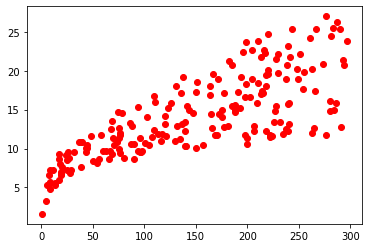

In [25]:
plt.plot(data_ads["TV"],data_ads["Sales"], "ro")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

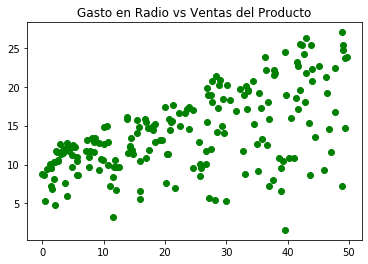

In [28]:
plt.plot(data_ads["Radio"],data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Periodico vs Ventas del Producto')

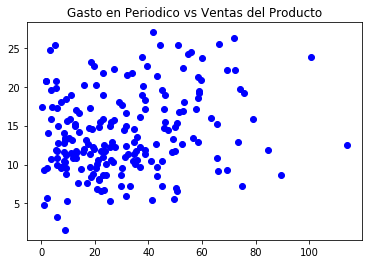

In [29]:
plt.plot(data_ads["Newspaper"],data_ads["Sales"], "bo")
plt.title("Gasto en Periodico vs Ventas del Producto")

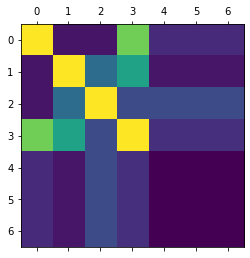

In [30]:
plt.matshow(data_ads.corr())